# Aufgabe 18 Lösungsvorschlag

In [1]:
Solve_Model_i(b, t) = [t ones(length(t))]\b 
Solve_Model_ii(b, t) = [t.^2 t ones(length(t))]\b 
Solve_Model_iii(b, t) = [sin.(t) cos.(t)]\b ;

## Ein paar kleine Tests mit Plots

In [2]:
using Plots
using Random

In [3]:
Model_i_rhs(x, t) = x[1].*t .+ x[2]
Model_ii_rhs(x, t) = x[1].*t.^2 .+ x[2].*t .+ x[3]
Model_iii_rhs(x, t) = x[1].*sin.(t) .+ x[2].*cos.(t) ;

In [4]:
function teste(Model_rhs, Solve_Model, θ, ϵ)        
    t = 10*rand(100)                          # Testdaten erzeugen
    b = Model_rhs(θ, t) .+ ϵ.*randn(size(t))  # auswerten und stören
    x = Solve_Model(b, t)                     # Least-Squares lösen
    @show θ
    @show x
    scatter(t, b)
    tt = LinRange(minimum(t), maximum(t), 200)
    plot!(tt, Model_rhs(x, tt))
end

teste (generic function with 1 method)

θ = [2.0, 1.0]
x = [1.9842352259482612, 1.0869650334067233]


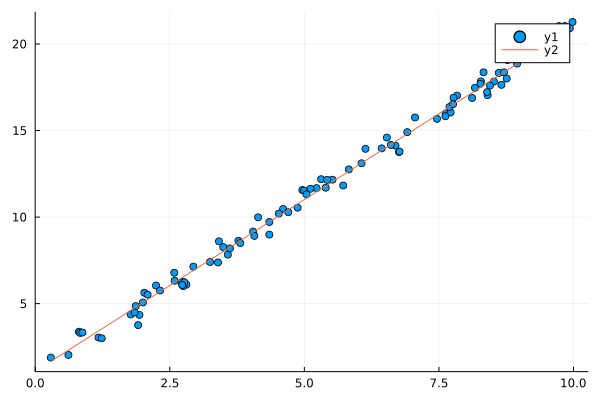

In [5]:
Random.seed!(0815)
teste(Model_i_rhs, Solve_Model_i, [2.0, 1.0], 0.4)

θ = [2.0, 1.0, 0.5]
x = [1.9855718121817825, 0.9999283058454608, 1.053707594822399]


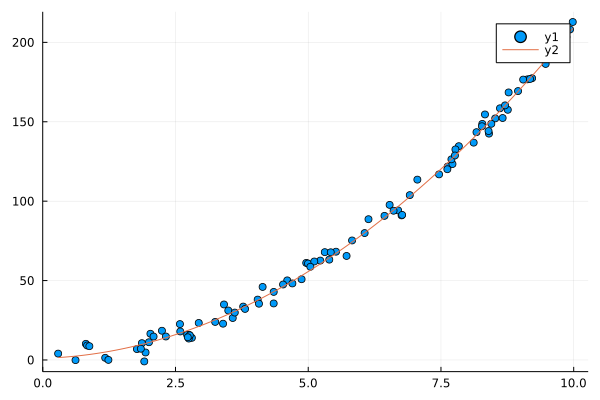

In [6]:
Random.seed!(0815)
teste(Model_ii_rhs, Solve_Model_ii, [2.0, 1.0, 0.5], 4)

θ = [2.0, 1.0]
x = [1.922584558391163, 1.072064499003606]


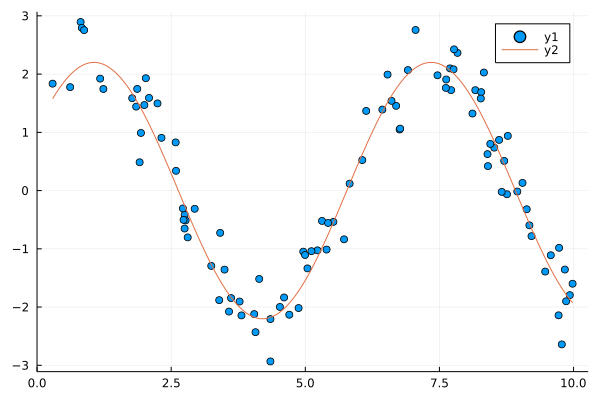

In [7]:
Random.seed!(0815)
teste(Model_iii_rhs, Solve_Model_iii, [2.0, 1.0], 0.4)